# Plotting tree showing taxonomic relation of strains


In [3]:
import sys, os
import glob 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import collections
import builtins
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from scipy.integrate import odeint #this is the module to solve ODEs

%matplotlib inline
import scipy.stats 
import json

import csv
from collections import defaultdict
from pprint import pprint

################################
#load information of species to include
#################################
#load species information for all characterized species
speciesinformation=pd.read_csv("data_hplc/species_properties.csv",skiprows=1)
#display(speciesinformation.head())
display(speciesinformation)
from ete3 import Tree, TreeStyle, TextFace, add_face_to_node
import plot_eteTree 
#adjusted from https://gist.github.com/jolespin/5d90deff552138d73de7ed4bdd9ac57a


,species_HPLCname,species,new_species,species.1,species_short,new_genus,genus,new_family,family,new_order,order,new_class,class,new_phylum,phylum
0,B.uniformis,Bacteroides uniformis,Bacteroides uniformis,Bacteroides uniformis,B. uniformis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
1,B.fragilis,Bacteroides fragilis,Bacteroides fragilis,Bacteroides fragilis,B. fragilis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
2,B.ovatus,Bacteroides ovatus,Bacteroides ovatus,Bacteroides ovatus,B. ovatus,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
3,B.theta,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,B. theta,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
4,B.finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,B. finegoldii,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
5,B.vulgatus,Phocaeicola vulgatus,Phocaeicola vulgatus,Bacteroides vulgatus,B. vulgatus,Phocaeicola,Phocaeicola,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
6,P.copri,Prevotella copri,Prevotella copri,Prevotella copri,P. copri,Prevotella,Prevotella,Prevotellaceae,Prevotellaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
7,P.distastonis,Parabacteroides distasonis,Parabacteroides distasonis,Bacteroides distasonis,P. distastonis,Parabacteroides,Parabacteroides,Tannerellaceae,Tannerellaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
8,R.intestinalis,Roseburia intestinalis,Roseburia intestinalis,Roseburia intestinalis,R. intestinalis,Roseburia,Roseburia,Lachnospiraceae,Lachnospiraceae,Eubacteriales,Eubacteriales,Clostridia,Clostridia,Bacillota,Firmicutes
9,E.rectale,Eubacterium rectale,Agathobacter rectalis,Eubacterium rectale,E. rectale,Agathobacter,Lachnospiraceae_NA,Lachnospiraceae,Lachnospiraceae,Eubacteriales,Eubacteriales,Clostridia,Clostridia,Bacillota,Firmicutes


# Load general files and generate tree

## Note: This uses the taxonomic abundance tables caliulatioed in subfolder microbiota_composition. To decide if all or only healthy samples should be considered run the script in the folder first and make your selection there.


Index(['average', 'AsnicarF_2017', 'AsnicarF_2021', 'BackhedF_2015',
       'Bengtsson-PalmeJ_2015', 'ChuDM_2017', 'CosteaPI_2017', 'DavidLA_2015',
       'DeFilippisF_2019', 'DhakanDB_2019', 'FengQ_2015', 'FerrettiP_2018',
       'GuptaA_2019', 'HMP_2012', 'HMP_2019_ibdmdb', 'HMP_2019_t2d',
       'HallAB_2017', 'HanniganGD_2017', 'HansenLBS_2018',
       'Heitz-BuschartA_2016', 'IjazUZ_2017', 'JieZ_2017', 'KarlssonFH_2013',
       'KeohaneDM_2020', 'LeChatelierE_2013', 'LiJ_2014', 'LiJ_2017',
       'LiSS_2016', 'LifeLinesDeep_2016', 'LiuW_2016', 'LouisS_2016',
       'MehtaRS_2018', 'NagySzakalD_2017', 'NielsenHB_2014',
       'Obregon-TitoAJ_2015', 'QinJ_2012', 'QinN_2014', 'RampelliS_2015',
       'RaymondF_2016', 'SankaranarayananK_2015', 'SchirmerM_2016',
       'ShaoY_2019', 'ThomasAM_2018a', 'ThomasAM_2018b', 'ThomasAM_2019_c',
       'VincentC_2016', 'VogtmannE_2016', 'WampachL_2018', 'WirbelJ_2018',
       'XieH_2016', 'YachidaS_2019', 'YassourM_2016', 'YassourM_2018',
     

'HMP_2019_ibdmdb'

['Bacteroidetes', 'Firmicutes', 'Actinobacteria', 'Proteobacteria']
['Bacteroidia', 'Clostridia', 'Actinomycetia', 'Coriobacteriia', 'Gammaproteobacteria']
['Bacteroidales', 'Eubacteriales', 'Bifidobacteriales', 'Coriobacteriales', 'Enterobacterales']
['Bacteroidaceae', 'Prevotellaceae', 'Tannerellaceae', 'Lachnospiraceae', 'Oscillospiraceae', 'Bifidobacteriaceae', 'Coriobacteriaceae', 'Enterobacteriaceae']
['Bacteroides', 'Phocaeicola', 'Prevotella', 'Parabacteroides', 'Roseburia', 'Lachnospiraceae_NA', 'Lachnospira', 'Dorea', 'Fusicatenibacter', 'Blautia', 'Faecalibacterium', 'Oscillospiraceae_NA', 'Ruminococcus', 'Bifidobacterium', 'Collinsella', 'Escherichia']
['Bacteroides uniformis', 'Bacteroides fragilis', 'Bacteroides ovatus', 'Bacteroides thetaiotaomicron', 'Bacteroides finegoldii', 'Phocaeicola vulgatus', 'Prevotella copri', 'Parabacteroides distasonis', 'Roseburia intestinalis', 'Eubacterium rectale', 'Lachnospira eligens', 'Dorea longicatena', 'Fusicatenibacter saccharivora

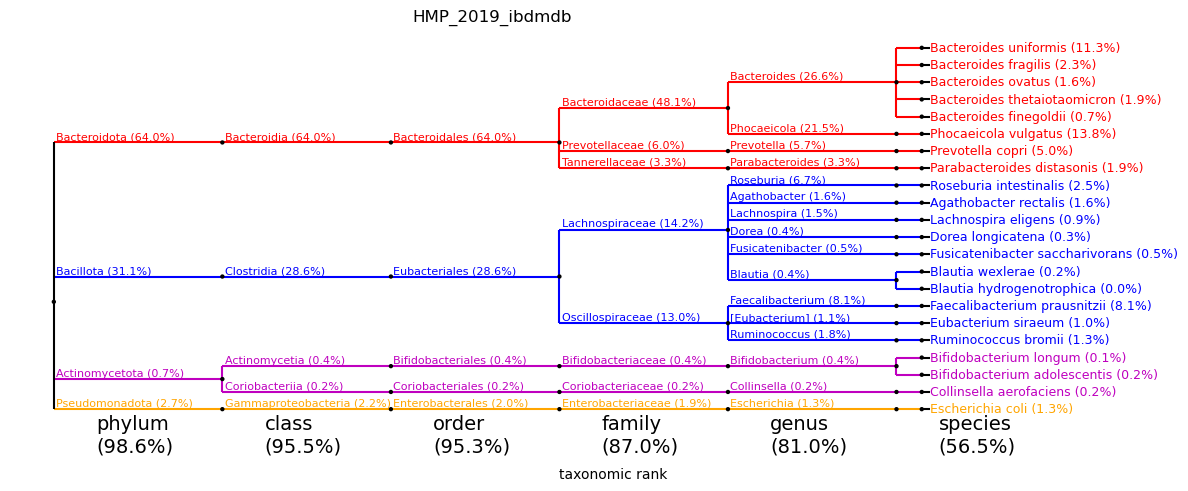

In [4]:

curdata=pd.read_csv("data_curated_microbiome/avabundance_class_healthy_adult_western.csv",skiprows=0,index_col=0,)
studylist=curdata.columns
display(studylist)

studylist=["HMP_2019_ibdmdb"]#"HMP_2012","AsnicarF_2021","HMP_2019_ibdmdb"]
############################
#plotting options for tree
##########################
phyla_colors=["r","b","m","orange","brown"] 
phyla=['Bacteroidetes', 'Firmicutes', 'Actinobacteria', 'Proteobacteria']

#define which study to use for abundance data
#study="HMP_2019_ibdmdb"
#fileending_abundanceinfo=""
#study="average"
fileending_abundanceinfo="_healthy_adult_western" #""
    
display()

for study in studylist:
    display(study)
    #use all samples from healthy adults (non-westernized marked as no)

    
    ################################
    #load abundance information (from analysis of metagenomics data"
    # ! modify here if other studies should be included
    ################################
    abundanceinformation=[]
    taxa_levellist=[]
    taxa_levellistC=[]
    for level in ["phylum","class","order","family","genus","species"]:
        taxa_levellist.append([])
        taxa_levellistC.append([])
        abundanceinformation.append(pd.read_csv("data_curated_microbiome/avabundance_"+level+fileending_abundanceinfo+".csv",skiprows=0,index_col=0,))
    all_species_list=[]
    all_species_list_short=[]
    
    #################################
    #generate Newick tree
    ################################
    branchdistance=":2" #distance between branches
    branchdistance_species=":0.3" #distance of lead (last name)
    
    #start analysis
    branchdistance_number=float(branchdistance[1:])
    #phyla=speciesinformation["phylum"].unique()
    newick="("
    cP=-1
    
    #go through each taxonomic level
    for phylum in phyla:
        taxa_levellist[0].append(phylum)  
        cP=cP+1
        taxa_levellistC[0].append(phyla_colors[cP])
        select=speciesinformation.loc[speciesinformation["phylum"]==phylum]
        classes=select["class"].unique()
        
        if cP==0:
                newick=newick+"("
        else:
                newick=newick+",("
        cI=-1    
        for classc in classes:
            taxa_levellist[1].append(classc)
            taxa_levellistC[1].append(phyla_colors[cP])
            cI=cI+1
            select1=select.loc[select["class"]==classc]
            if cI==0:
                newick=newick+"("
            else:
                newick=newick+",("
            orders=select1["order"].unique()
            oI= -1
            for order in orders:
                taxa_levellist[2].append(order)
                taxa_levellistC[2].append(phyla_colors[cP])
                oI=oI+1
                select2=select1.loc[select1["order"]==order]
                if oI==0:
                    newick=newick+"("
                else:
                    newick=newick+",("
                families=select2["family"].unique()
                fI=-1
                for family in families:
                    taxa_levellist[3].append(family)
                    taxa_levellistC[3].append(phyla_colors[cP])
                    fI=fI+1
                    select3=select2.loc[select2["family"]==family]
                    genus=select3["genus"].unique()
                    if fI==0:
                        newick=newick+"("
                    else:
                        newick=newick+",("
    
                    gI=-1
                    for genus in genus:
                        taxa_levellist[4].append(genus)
                        taxa_levellistC[4].append(phyla_colors[cP])
                        gI=gI+1
                        select4=select3.loc[select3["genus"]==genus]
                        species=select4["species"].unique()
                        if gI==0:
                            newick=newick+"("
                        else:
                            newick=newick+",("
                        spc=-1
                        for speciesc in species:
                                taxa_levellist[5].append(speciesc)
                                taxa_levellistC[5].append(phyla_colors[cP])
                                spc=spc+1
                                if spc>0:
                                    newick=newick+","
                                select5=select4.loc[select4["species"]==speciesc]
                                all_species_list.append(speciesc)
                                newick= newick+speciesc+branchdistance_species
                        newick=newick+")"+genus+branchdistance
                    newick=newick+")"+family+branchdistance
                newick=newick+")"+order+branchdistance
            newick=newick+")"+classc+branchdistance
        newick=newick+")"+str(phylum)+branchdistance  
    newick=newick+");"
    
    #save tree
    text_file = open("newick.txt", "w")
    n = text_file.write(newick)
    text_file.close()
    
    #print(all_species_list)
    
    
    #####################
    #for different nodes of tree get abundance lvele
    ######################
        
    
    lc=-1
    abundancevalues=[]
    for level in ["phylum","class","order","family","genus","species"]:
        abundancevalues.append([])
        lc=lc+1
        print(taxa_levellist[lc])
        for taxidentifier in taxa_levellist[lc]:
            #print(taxidentifier)
            #print(study)
            abundancevalues[-1].append(abundanceinformation[lc].at[taxidentifier,study])
    
    
    #generate list with abundance for all taxonomic levels
    alltaxonomicnames=[]
    alltaxonomiccolors=[] #color (currently based on phyla)
    alltaxonomiccolors_phylum=[] #color (phyla in color rest black)
    taxonomiclevel=[]
    
    alltaxonomicabundances=[]
    abundancevalues_sum=[]
    lc=-1
    for level in ["phylum","class","order","family","genus","species"]:
        lc=lc+1
        #colors for taxonomic names
        #option 1: only phylum in phylum color, others black
        #if level=="phylum":
        #    alltaxonomiccolors_phylum=alltaxonomiccolors_phylum+taxa_levellistC[lc]
        #else:
        #    alltaxonomiccolors_phylum=alltaxonomiccolors_phylum+["k"]*len(taxa_levellist[lc])
        #option 2: set all names according to phylum:
        alltaxonomiccolors_phylum=alltaxonomiccolors_phylum+taxa_levellistC[lc]
        taxonomiclevel=taxonomiclevel+[level]*len(taxa_levellist[lc])
    
       
        alltaxonomicnames=alltaxonomicnames+taxa_levellist[lc]
        alltaxonomiccolors=alltaxonomiccolors+taxa_levellistC[lc]
        abundancevalues_sum.append(sum(abundancevalues[lc]))
        alltaxonomicabundances=alltaxonomicabundances+abundancevalues[lc]
    
    #for easier handling, generate dataframe with all information
    data_abundancec=pd.DataFrame(list(zip(alltaxonomicnames, alltaxonomicabundances, alltaxonomiccolors,alltaxonomiccolors_phylum,taxonomiclevel)))
    data_abundancec.columns=["taxidentifier","abundance","color","color_phylum","tax_level"]
    data_abundancec.set_index("taxidentifier",inplace=True)
    #print("sum of abundance")
    #print(abundancevalues_sum)
    
    
    
    
    #add short and alternamtive names according to 
    for iter, row in data_abundancec.iterrows():
        levelc=row["tax_level"]
        taxind=iter
        curinfo=speciesinformation.loc[speciesinformation[levelc]==iter]
        if levelc=="species":
            shortn=curinfo[level+"_short"]
            data_abundancec.at[iter,"short_name"]=shortn.iloc[0]
        shortn=curinfo["new_"+levelc]
        if (shortn.shape[0]>1) and (levelc=="species"):
            error
        data_abundancec.at[iter,"new_name"]=shortn.iloc[0]
    
    #display(data_abundancec.head(15))
    #consistency check, taxonomic identifiers should be unique
    if len(alltaxonomicnames) != len(set(alltaxonomicnames)):
        print("Error: non unique used of taxonomic identifiers")
        print([item for item, count in collections.Counter(alltaxonomicnames).items() if count > 1])
        error
    
    ############
    #generate ete3 tree from Newick tree
    ############
    
    t = Tree(newick, format=1)
    ts = TreeStyle()
    ts.show_leaf_name = False
    
    ############
    #ad properties to tree branches
    #############
    
    all_species_list_short=[]
    for leaf in t.traverse():
        nameleaf=leaf.name
        if len(nameleaf)>0:
            abundancec=str(round(data_abundancec.at[nameleaf,"abundance"],1))+"%"
    
            
            color=data_abundancec.at[nameleaf,"color"] #color for lines
            color_phylum=data_abundancec.at[nameleaf,"color_phylum"] #color for taxonomic names
            new_name=data_abundancec.at[nameleaf,"new_name"]
            short_name=data_abundancec.at[nameleaf,"short_name"]
            if short_name != "nan":
                all_species_list_short.append(short_name)
            #print(nameleaf)
            #print(abundancec)
            leaf.add_features(abundance=abundancec)
            leaf.add_features(new_name=new_name)
            leaf.add_features(short_name=short_name)
            leaf.add_features(color=color_phylum)
            leaf.img_style['hz_line_color'] = color
            leaf.img_style['vt_line_color'] = color
        else:
            leaf.add_features(abundance="")
            leaf.add_features(abundance="")
            leaf.add_features(new_name="")
            leaf.add_features(short_name="")
            leaf.add_features(color="k")
            leaf.img_style['hz_line_color'] = "k"
            leaf.img_style['vt_line_color'] = "k"
    
            
        leaf.img_style['hz_line_width']=2
        leaf.img_style['vt_line_width']=2
        leaf.img_style['fgcolor']='#000000'
    
    #print(all_species_list_short)
    
    
    fig, ax = plt.subplots(1,1,figsize=(12,5))  #for barplots yields/excretion
    plot_eteTree.plot_tree(t, align_names=False, name_offset=None, max_dist=None, font_size=9, axe=ax,font_size2=8,alternative_names=True,short_names=False)
    lc=-1
    for level in ["phylum","class","order","family","genus","species"]:
        lc=lc+1
        lpos=0.5+lc*branchdistance_number
        ax.text(lpos,-1.2,level,fontsize=14)
        ax.text(lpos,-2.5,"("+str(round(abundancevalues_sum[lc],1))+"%)",fontsize=14,color='k')

    ax.set_title(study)
    ax.text(6,-4,"taxonomic rank")
    fig.tight_layout()
    fig.savefig("plot_output_figure1/tree_matplotlib.pdf")
    plt.show()
    
    ###### old, using eTe3 plotting options
    
    #decide what to add to nodes
    def my_layout(node):
            F = TextFace(node.name[:5]) #tight_text=True
            A = TextFace(node.abundance) #, tight_text=True 
            #print(node)
            if node.is_leaf():
                add_face_to_node(F, node, column=1, position="branch-top")
                #add_face_to_node(F, node, column=0,position='aligned')
                add_face_to_node(A, node, column=0,position='aligned')
            else:
                add_face_to_node(F, node, column=0, position="branch-top")
                add_face_to_node(A, node, column=0, position="branch-bottom")
    
                
                #if node.is_leaf():
            #        seq_face = SeqMotifFace(node.sequence, seqtype='aa', seq_format='seq')
            #        add_face_to_node(seq_face, node, column=0, position='aligned')
        
    ts.layout_fn = my_layout
    
    #ts.show_branch_length = True
    #ts.show_branch_support = True
    #t.render("plot_output_Fig2/tree.pdf", w=8, units="in", tree_style=ts)
    
    #t.show(tree_style=ts)



# Plot tree with full species information

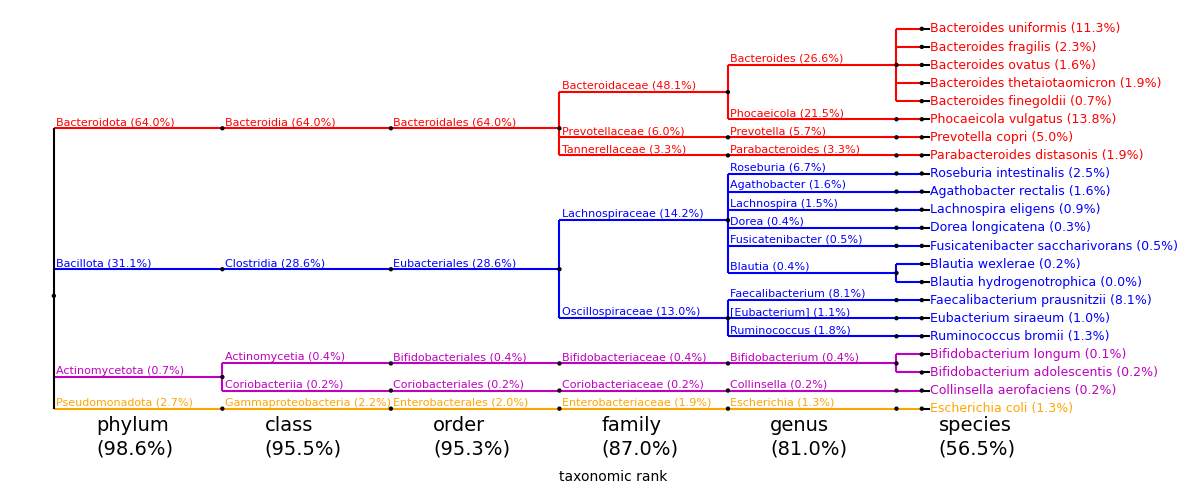

In [5]:

fig, ax = plt.subplots(1,1,figsize=(12,5))  #for barplots yields/excretion
plot_eteTree.plot_tree(t, align_names=False, name_offset=None, max_dist=None, font_size=9, axe=ax,font_size2=8,alternative_names=True,short_names=False)
lc=-1
for level in ["phylum","class","order","family","genus","species"]:
    lc=lc+1
    lpos=0.5+lc*branchdistance_number
    ax.text(lpos,-1.2,level,fontsize=14)
    ax.text(lpos,-2.5,"("+str(round(abundancevalues_sum[lc],1))+"%)",fontsize=14,color='k')

ax.text(6,-4,"taxonomic rank")
fig.tight_layout()
fig.savefig("plot_output_figure1/tree_matplotlib.pdf")
plt.show()

###### old, using eTe3 plotting options

#decide what to add to nodes
def my_layout(node):
        F = TextFace(node.name[:5]) #tight_text=True
        A = TextFace(node.abundance) #, tight_text=True 
        #print(node)
        if node.is_leaf():
            add_face_to_node(F, node, column=1, position="branch-top")
            #add_face_to_node(F, node, column=0,position='aligned')
            add_face_to_node(A, node, column=0,position='aligned')
        else:
            add_face_to_node(F, node, column=0, position="branch-top")
            add_face_to_node(A, node, column=0, position="branch-bottom")

            
            #if node.is_leaf():
        #        seq_face = SeqMotifFace(node.sequence, seqtype='aa', seq_format='seq')
        #        add_face_to_node(seq_face, node, column=0, position='aligned')
    
ts.layout_fn = my_layout

#ts.show_branch_length = True
#ts.show_branch_support = True
#t.render("plot_output_Fig2/tree.pdf", w=8, units="in", tree_style=ts)

#t.show(tree_style=ts)


# Plot compact tree without full names

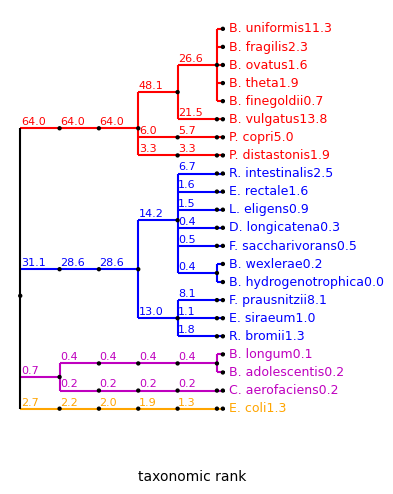

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,5))  #for barplots yields/excretion
plot_eteTree.plot_tree(t, align_names=False, name_offset=None, max_dist=None, font_size=9, axe=ax,font_size2=8,alternative_names=False,short_names=True,plot_abundancenumbers=True,abundancestyle="plain")
lc=-1
for level in ["phylum","class","order","family","genus","species"]:
    lc=lc+1
    lpos=0.5+lc*branchdistance_number
    
    #ax.text(lpos,-1.5,level,fontsize=10)
    #ax.text(lpos,-2.5,str(round(abundancevalues_sum[lc],1)),fontsize=10,color='k')

ax.text(6,-4,"taxonomic rank")
fig.tight_layout()
fig.savefig("plot_output_figure1/tree_matplotlib_compact.pdf")
plt.show()


# Prepare plots for paper

This script takes data from analysis_out.csv which is generated in the final_analysis notebook. 


In [7]:
###################
#decide what to plot
####################

#use a table with average values  (to generate this table, run Final_analysis_hplcdata.ipynb
dataout_av=pd.read_csv("data_hplc/analysis_out_av.csv")
display(dataout_av.head())
display(speciesinformation.head())

#sort list manually 
sorter=["B.vulgatus","B.fragilis","B.ovatus","B.theta","B.finegoldii","B.uniformis",'P.copri','P.distastonis',"E.rectale","R.intestinalis","F.prausnitzii","R.bromii","B.longum","B.adolescentis","C.aerofaciens","E.coli","E.coliI","E.coliII","Fecal","FecalPP","ECOR","E.halli"]
dataout_av.sort_values(by="species", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

display(dataout_av)

#speciesall=speciesinformation["species_HPLCname"]
speciesall=["B.vulgatus","B.fragilis","B.ovatus","B.theta","B.finegoldii","B.uniformis",'P.copri','P.distastonis',"E.rectale","R.intestinalis","F.prausnitzii","R.bromii","B.longum","B.adolescentis","C.aerofaciens","E.coli"]

samplenamelist=[[],[],[],[]]
for species in speciesall:
    mc=-1
    for medium in ["e","BHI","simple","YCA"]:
            mc=mc+1
            selectc=dataout_av.loc[(dataout_av["experiment_short"]=="av") & (dataout_av["species"]==species) & (dataout_av["medium"]==medium)]
            #print(selectc)
            for il in range(0,selectc.shape[0]):
                samplenamelist[mc].append(selectc["exp_number"].iloc[il])
print("list output")
for mc in range(0,len(samplenamelist)):
    print(samplenamelist[mc])

print(samplenamelist[3])

sublistshort=['glu','mal','ace','but','for','lac','pro','suc']


#colorlist=['b','b','#1b9e77','#66a61e','#a6761d','#e7298a','#d95f02','#7570b3']


#colorlist = met_brewer.met_brew(name="Egypt", n=8, brew_type="continuous")
#print(colorlist)

colorlist=['#dd5129', '#1e8b99', '#2c7591', '#85635d', '#34a28d', '#fab255', '#acb269', '#5db27d']
#['glucose', 'maltose', 'acetate', 'butyrate', 'formate', 'lactate', 'propionate', 'succinate']
#sublist=['glucose','maltose','acetate','butyrate','formate','lactate','propionate','succinate'] #skipp ethanol here

colorlist=['#dd5129', '#85635d', '#2c7591', '#34a28d', '#fab255','#5db27d', '#1e8b99','#acb269']

sublist=['glucose','maltose','acetate','butyrate','formate','lactate','propionate','succinate'] #skipp ethanol here
print(sublist)

markerlist=['s','h','v','^','<','>','d','o']
energycontent=np.array([0.68,1.36,0.21,0.52,0.,.33,0.37,0.36]) #kcal/mmol #the energy per mm for different fermentation products3
cfactorlist=[6,12,2,4,1,3,3,4]
markerlist=['s','v','^','<','>','d','o','h']
   


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
0,0,0.0,29.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,33,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,45.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,51,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,38.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,42,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,143.0,NaN,DSM20083,B.adolescentis,NaN,stan_BHI_30Dec22,199,BHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,142.0,NaN,DSM20083,B.adolescentis,NaN,stan_BHI_30Dec22,198,BHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,species_HPLCname,species,new_species,species.1,species_short,new_genus,genus,new_family,family,new_order,order,new_class,class,new_phylum,phylum
0,B.uniformis,Bacteroides uniformis,Bacteroides uniformis,Bacteroides uniformis,B. uniformis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
1,B.fragilis,Bacteroides fragilis,Bacteroides fragilis,Bacteroides fragilis,B. fragilis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
2,B.ovatus,Bacteroides ovatus,Bacteroides ovatus,Bacteroides ovatus,B. ovatus,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
3,B.theta,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,B. theta,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
4,B.finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,B. finegoldii,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes


ValueError: 'B.hydrogenotrophica' is not in list